# Let's take a look at characteristics of various wines

First, let's find some cool data --> http://www3.dsi.uminho.pt/pcortez/wine/

Hit that link - and download the zip. Then, let's get started.

In [77]:
## lets import some helpful packages

import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [44]:
#now let's build some dataframes

red = pd.read_csv('winequality-red.csv', index_col=0)
white = pd.read_csv('winequality-white.csv', index_col=0)

In [45]:
red.tail()

""
"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76;11.2;6
6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.75;11;6
5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71;10.2;5
6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;11;6


Ok - that's really ugly. Lets think about what happened. We imported from a csv, but it seems that the values
are delimited with ";" insteasd of just commas. Pandas doesn't like this, so let's try using the sep='' kwarg to solve this.

In [46]:
red = pd.read_csv('winequality-red.csv', index_col=0, sep=';')
white = pd.read_csv('winequality-white.csv', index_col=0, sep=';')

In [47]:
red.tail()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [48]:
white.tail()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


Awesome - now we're on the right track. Now, let's explore these datasets just a little bit. 

In [50]:
red.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1599 entries, 7.4 to 6.0
Data columns (total 11 columns):
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(10), int64(1)
memory usage: 149.9 KB


So - what's the first obvious thing about this data set? It's too good to be true! There are no missing values. Later in the class we'll discuss how to handle bad or missing data.

Let's do some very basic exploration. It seems like this dataset basically contains a bunch of characteristics of various wines, as well as some sort of "quality" rating.

## Now let's find a few summary stats:

What's the average residual sugars in red wines? 2.538806

How much alchohol does the 50% percentile white wine have? 10.400000	

What feature seems to be most positively correlated with quality for red wine? Alcohol
 
Is is the same for white? Yes - alcohol takes the cake.
    
What feature seems to be most negatively correlated with quality for red wine? Volatile acidity

Is is the same for white? No - for white wine, it's Density. Interesting.

In [74]:
## functions needed:
##.corr()
##.describe()

## Ok, let's move on to some harder stuff

It's kind of annoying to continue dealing with two separate data frames, so, let's combine them. . .

But wait. . .

How are we going to tell the difference between red data points white data points?

We'll need to add a column to keep the colors straight. Let's do that now.

In [88]:
red['color'] = "red"

In [89]:
red.tail()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,,,,,,,,,,,,
6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red
6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red


See? That was super easy. Now why don't you do the same for the white wine data.

In [102]:
#add the 'color' column to the white wine data. Once you're done, we'll be able to put it all together.


white['color'] = "white"

Ok, let's take a look at each DataFrame one last time, just to confirm we haven't messed anything up.

In [103]:
white.tail()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,,,,,,,,,,,,
6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [104]:
red.tail()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,,,,,,,,,,,,
6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red
6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red


Looks like we got lucky here. . .

The column names match exactly, so let's merge these two DataFrames. This is super easy to do. . . just need the right function.

In [105]:
frames = [red, white]
red_and_white = pd.concat(frames)

In [108]:
#lets see what we created. . .
red_and_white.tail()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,,,,,,,,,,,,
6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [110]:
#looks good so far - let's just double check that we didn't lose any data. A quick len() check will do.

len(red) + len(white) - len(red_and_white)

0

Now - although we'll get way deeper on visulaization later. Let's dip our toes in now, just to feel what this data looks like.

A quick set of pairplots, is a great way of visualizing relationships.

<Figure size 800x640 with 0 Axes>

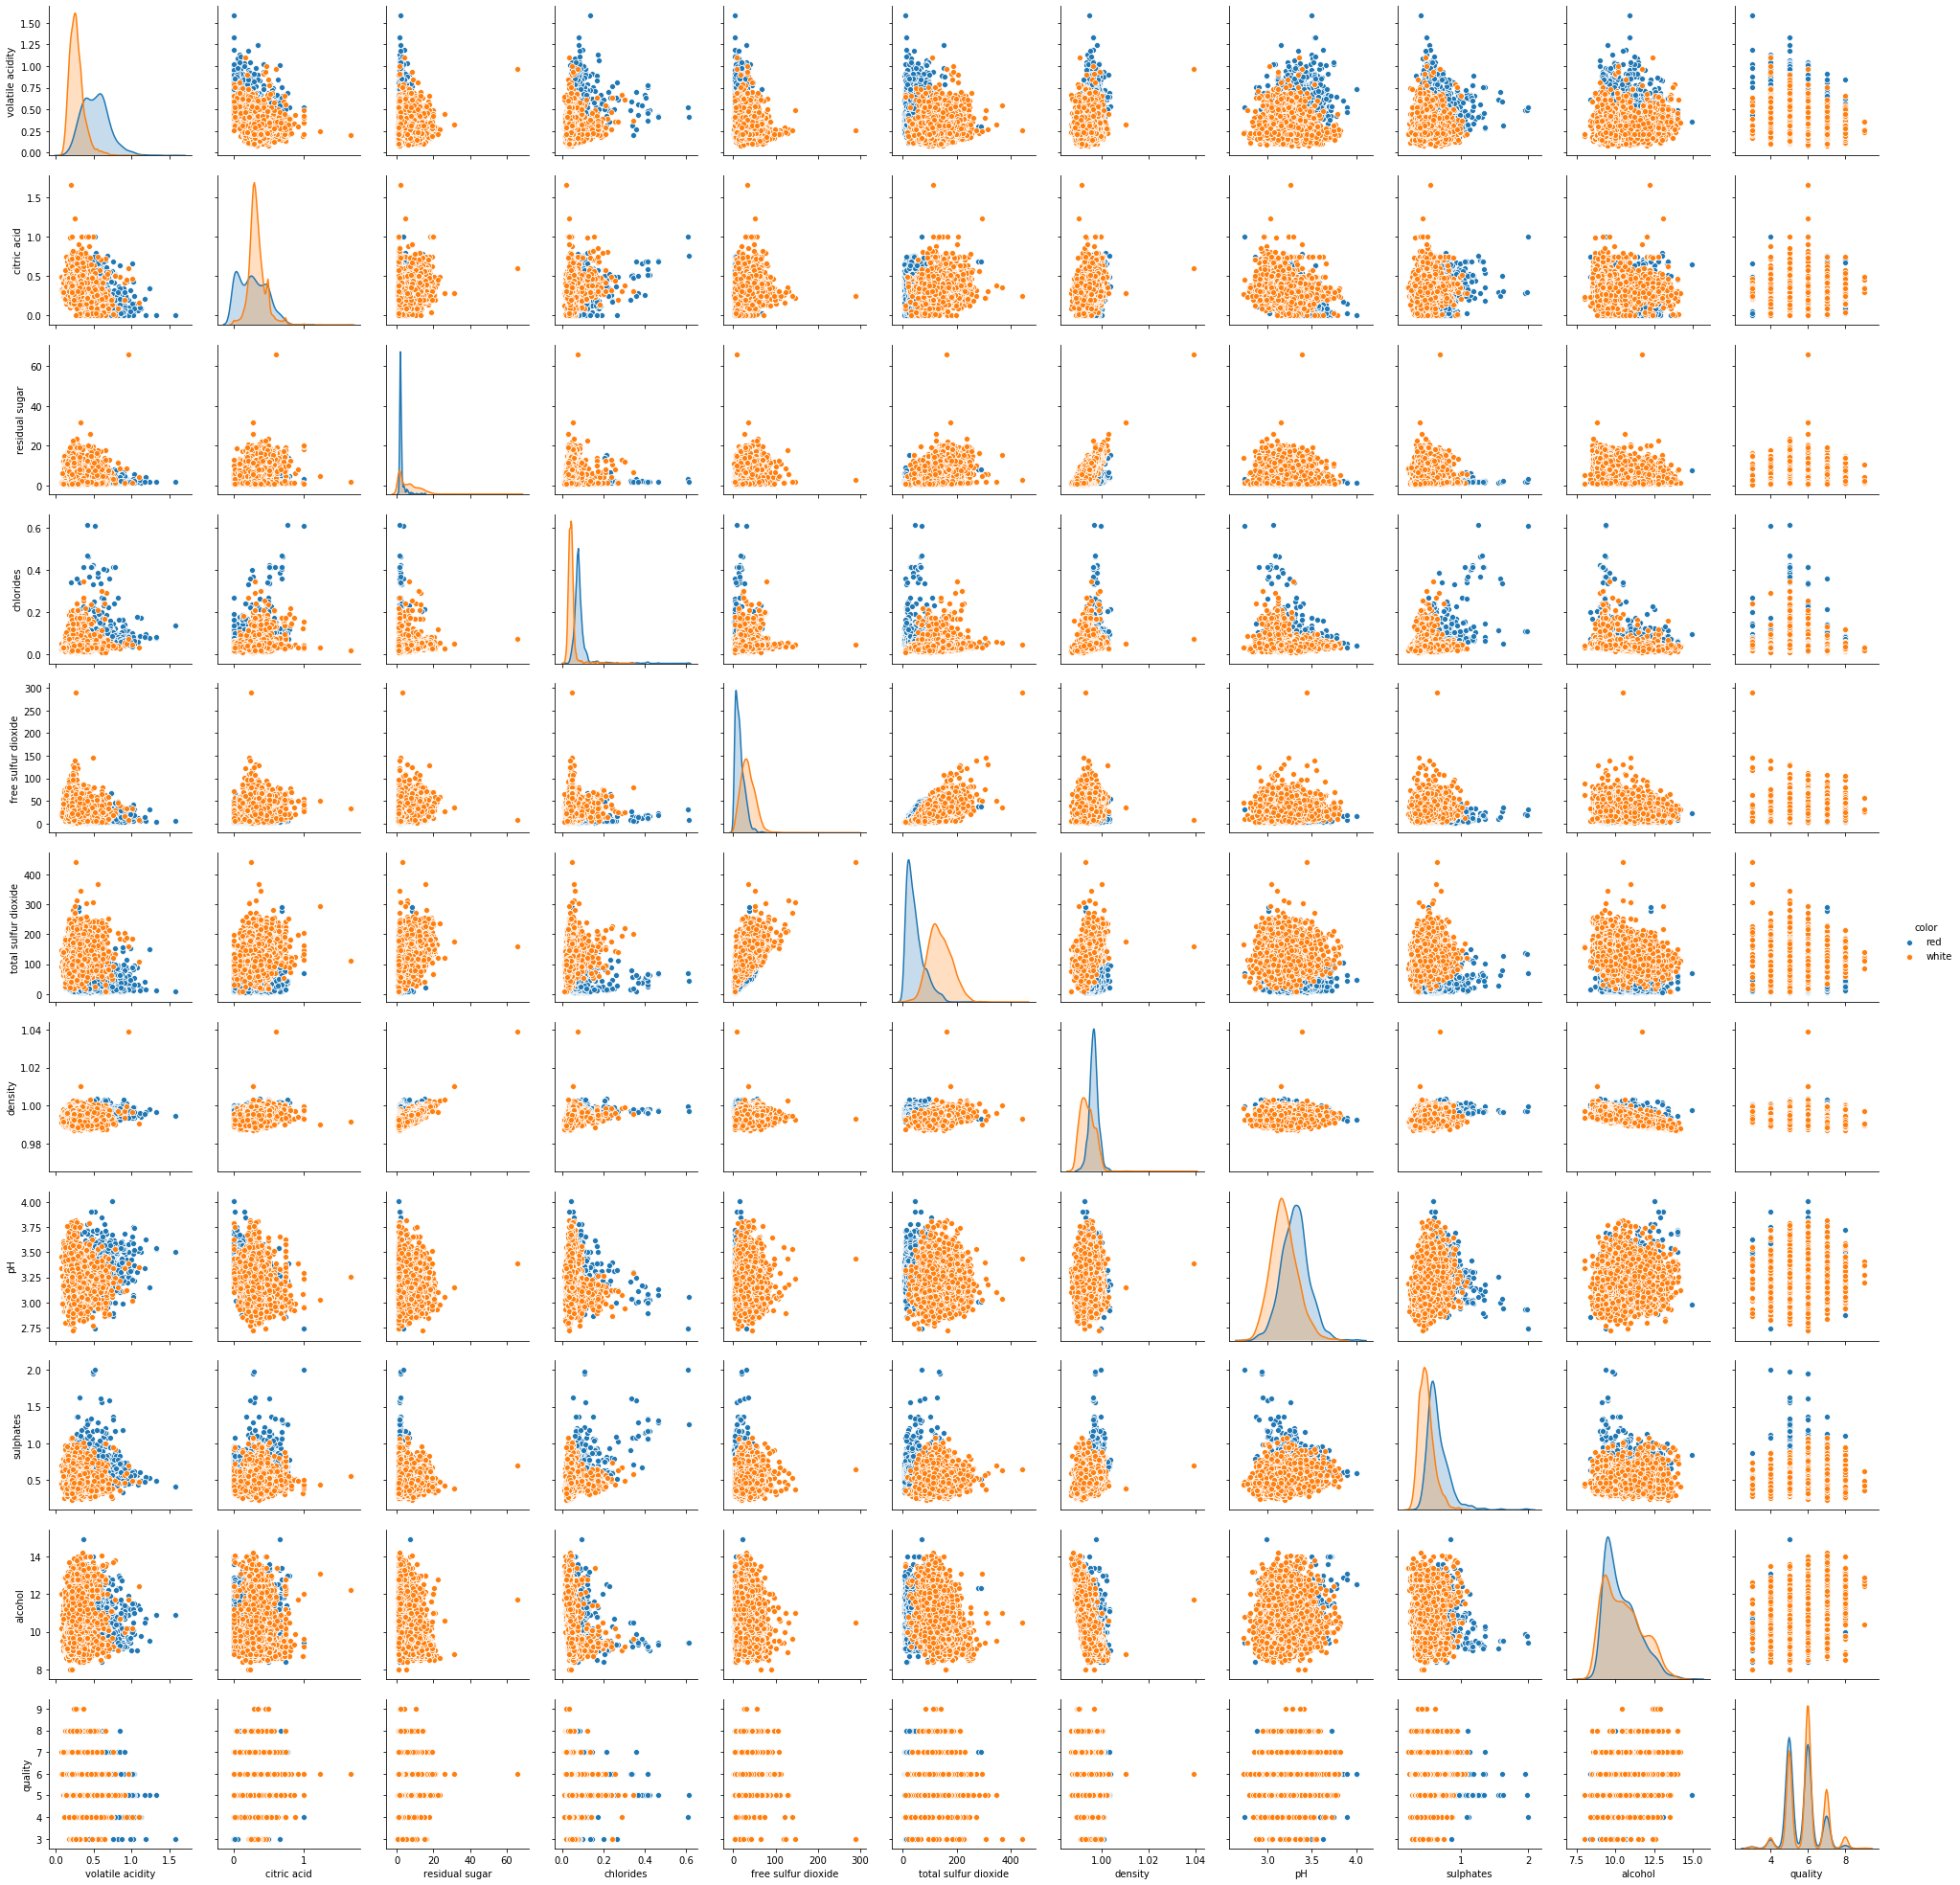

In [112]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(red_and_white, hue="color")
plt.show()